<a href="https://colab.research.google.com/github/MiyoBran/Alura-ONE-G9/blob/main/formacion-estadisticas-y-machine-learning-grupo9-one/02-estadistica-python-probabilidad-muestreo/EST_02_estadistica_con_python_probabilidad_y_muestreo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 2</font>
***

# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, características generales de la población, educación, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasileño de Geografía y Estadística (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del residente en años en la fecha de referencia .

> ### Altura (elaboración propia)
> ***

Altura del habitante en metros.

> ### UF
> ***

Unidad Federal

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin educación o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinado|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indígena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era válido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

### Importando pandas y leyendo el dataset del proyecto

https://pandas.pydata.org/

In [1]:
import pandas as pd
print('Versión de pandas -> %s' % pd.__version__)

Versión de pandas -> 2.2.2


In [2]:
#Para no tener problemas ocn la ñ , usamos el encoding
datos = pd.read_csv('datos.csv', encoding = 'latin-1')

In [3]:
datos.head()

,Ciudad,Sexo,Edad,Color,AÃ±os de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categorías. Estas categorías juntas representan todo el espacio muestral, siendo también mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas que involucran situaciones de **éxito** y **fracaso**.

$$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tienen éxito

### Experimento Binomial

1. Realización de $n$ pruebas idénticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso.

4. La probabilidad de éxito está representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribución binomial

El valor esperado o la media de la distribución binomial es igual al número de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

$$\mu = n \times p$$

### Desviación estándar de la distribución binomial

La desviación estándar es la raíz quadrada del producto entre el número de experimentos, la probabilidad de éxito y la probabilidad de fracaso.

$$\sigma = \sqrt{n \times p \times q}$$

## Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [4]:
#Para hacer combinatorio utilizamos scipy.special
from scipy.special import comb

### Combinaciones

El número de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición

## $$0! = 1$$

### Explicacion Formula:
Vamos a destripar la fórmula de la combinatoria, paso a paso.

La ecuación completa es esta:


## $$C_{k}^{n} = \frac{n!}{k!(n - k)!}$$

Imagina que tienes **25 prospectos** (clientes potenciales) y tu equipo de ventas solo tiene capacidad operativa para gestionar una cartera de **20 clientes**. Queremos saber cuántas carteras distintas podrías armar.

### 1. El Numerador: $n!$ (El Caos Total)

El factorial de arriba ($n!$, o sea $25!$) representa **absolutamente todas las formas posibles de ordenar a tus 25 prospectos en una fila**.

* Para el asiento número 1 de tu lista, tienes 25 opciones.
* Para el asiento número 2, te quedan 24 opciones (porque ya sentaste a uno).
* Y así sucesivamente hasta llegar al último.
Matemáticamente, es $25 \times 24 \times 23... \times 1$. Es un número colosal porque asume dos cosas que no son ciertas para nuestro objetivo: asume que vas a usar a *todos los clientes* y que *el orden importa*.

### 2. El Denominador (Parte 1): $(n - k)!$ (Descartando lo que no sirve)

Tú no vas a gestionar a los 25 prospectos, solo a 20. Eso significa que hay **5 prospectos que se quedan afuera** ($25 - 20 = 5$).

* Al dividir el numerador por $(n - k)!$ (es decir, $5!$), le estás aplicando un filtro a la ecuación: *"Corta la lista. No me importan las combinaciones de los 5 clientes que se quedaron en la sala de espera"*.
* Si la fórmula terminara aquí ($\frac{25!}{5!}$), tendríamos lo que en estadística se llama **Permutación**. Te diría cuántas formas tienes de armar tu cartera de 20 clientes **si el orden importara** (Ej: Asumir que llamar al Cliente A el lunes y al Cliente B el martes es un escenario distinto que llamar al B el lunes y al A el martes).

### 3. El Denominador (Parte 2): $k!$ (Eliminando Duplicados)

En los negocios (y en la lotería Mega Sena), **el orden interno no altera el resultado final**. Una cartera de ventas formada por el Cliente A, el Cliente B y el Cliente C es exactamente la misma cartera que la formada por C, B y A. La facturación a fin de mes será idéntica.

* El $k!$ (en tu caso, $20!$) representa todas las formas posibles en las que esos 20 clientes elegidos pueden cambiar de asiento entre sí.
* Al agregar $k!$ dividiendo en la parte de abajo, estás "limpiando" los duplicados. Le dices a la matemática: *"Si el grupo tiene a las mismas 20 personas, cuéntalo como **1 sola combinación**, sin importar en qué orden los metí al sistema"*.


## <font color='blue'>Ejemplo: Mega Sena (Loteria)</font>

En una rueda de lotería Mega Sena tenemos un total de **60 números** para elegir, donde la apuesta mínima es de **seis números**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

# $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [5]:
combinaciones = comb(60,6)
combinaciones

np.float64(50063860.0)

In [6]:
probabilidad = 1 / combinaciones
print(f'{probabilidad:0.15f}')

0.000000019974489


---

### 📝 Apunte Teórico: Combinatoria y Distribución Binomial

Para predecir el futuro en los negocios, primero debemos saber cuántos futuros posibles existen. Aquí entra la combinatoria. Luego, calculamos qué tan probable es el futuro que deseamos, y ahí entra la distribución binomial.

#### 1. Combinatoria (El tamaño del universo posible)

La combinatoria responde a la pregunta: *"De un grupo grande de opciones, ¿de cuántas formas puedo elegir un grupo más pequeño sin importar el orden?"*
Si tienes 60 productos en el catálogo y un cliente suele comprar carritos de 6 productos, la combinatoria te dice cuántas combinaciones distintas de carritos pueden existir.

La fórmula utiliza factoriales (ej. $5! = 5 \times 4 \times 3 \times 2 \times 1$) y se define como:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde:

* $n$: Total de elementos disponibles (Ej: 60 números en la lotería).
* $k$: Elementos a elegir (Ej: 6 números en tu cartón).

**💻 Código Complementario (El motor de cálculo):**
En Big Data, calcular factoriales gigantes colapsa la memoria RAM. Usamos la función optimizada en C de SciPy:

In [7]:
from scipy.special import comb

# Calculamos las combinaciones posibles para la lotería (Mega Sena)
n_total = 60
k_elegidos = 6

combinaciones_posibles = comb(n_total, k_elegidos)
probabilidad_ganar = 1 / combinaciones_posibles

print(f"Combinaciones posibles: {combinaciones_posibles:,.0f}")
print(f"Probabilidad de ganar con 1 ticket: {probabilidad_ganar:.15f}")



Combinaciones posibles: 50,063,860
Probabilidad de ganar con 1 ticket: 0.000000019974489


### Ejercicio:
El que apuesta marca 20 números, de los 25 disponibles en el boleto, y puede ganar hasta 1 millón de pesos.

- Determine el número de combinaciones posibles (espacio muestral) y la probabilidad de ganar el premio jugando solo un boleto (considere sólo quince lugares decimales).

#### Opción A: La Vía Rápida de Producción (SciPy)

En el backend de un ERP, no queremos procesar operaciones matemáticas gigantescas porque consumen CPU. La función `comb` de la librería SciPy está programada en C, lo que la hace extremadamente rápida y eficiente.

In [8]:
from scipy.special import comb
# La via rapida ,la función comb de la librería SciPy está programada en C,
# lo que la hace extremadamente rápida y eficiente.


# Definimos las variables de negocio (Clean Code: sin magic numbers)
n_total = 25
k_marcados = 20

# Calculamos el espacio muestral (todas las combinaciones posibles)
espacio_muestral_scipy = comb(n_total, k_marcados)

# Calculamos la probabilidad de éxito con 1 solo intento
probabilidad_scipy = 1 / espacio_muestral_scipy

print("--- RESOLUCIÓN VÍA SCIPY (PRODUCCIÓN) ---")
print(f"Combinaciones posibles (Espacio Muestral): {espacio_muestral_scipy:,.0f}")
print(f"Probabilidad de ganar: {probabilidad_scipy:.15f}")

--- RESOLUCIÓN VÍA SCIPY (PRODUCCIÓN) ---
Combinaciones posibles (Espacio Muestral): 53,130
Probabilidad de ganar: 0.000018821757952




#### 2. Distribución Binomial (El modelo de Éxito/Fracaso)

Es el modelo estadístico rey en el mundo comercial. Solo se puede aplicar si tu problema cumple **4 reglas estrictas**:

1. **Solo hay 2 resultados posibles:** Compra o No Compra, Aprueba o Reprueba, Cara o Cruz.
2. **Eventos independientes:** Que el cliente A compre, no afecta la decisión del cliente B.
3. **Probabilidad constante:** La chance de éxito ($p$) es la misma en cada intento.
4. **Número fijo de intentos ($n$):** Sabes exactamente cuántas veces vas a repetir la prueba.

La fórmula que calcula la probabilidad exacta de obtener $k$ éxitos es:

# $$P(k) = \binom{n}{k} p^k q^{n-k}$$

**Traducción al Negocio:**

* $\binom{n}{k}$: Las combinaciones posibles en las que pueden ocurrir esos éxitos.
* $p^k$: La probabilidad de los éxitos multiplicada por sí misma $k$ veces.
* $q^{n-k}$: La probabilidad de los fracasos multiplicada por el resto de los intentos. ($q$ siempre es $1 - p$).


---
### Opción B: El Motor Matemático Nativo (Python Base)

Para tu cursada universitaria, necesitas demostrar que entiendes lo que hace la máquina por dentro. Aquí aplicamos la fórmula teórica de la combinatoria paso a paso usando la librería estándar `math`.

La fórmula matemática es:


# $$C_{20}^{25} = \frac{25!}{20!(25 - 20)!}$$

In [9]:
import math

# Definimos las mismas variables
n_total = 25
k_marcados = 20

# 1. Calculamos el numerador (n!)
numerador = math.factorial(n_total)

# 2. Calculamos el denominador: k! * (n - k)!
denominador = math.factorial(k_marcados) * math.factorial(n_total - k_marcados)

# 3. Aplicamos la división para obtener el espacio muestral
espacio_muestral_math = numerador / denominador

# 4. Calculamos la probabilidad
probabilidad_math = 1 / espacio_muestral_math

print("\n--- RESOLUCIÓN VÍA MATH (LABORATORIO ACADÉMICO) ---")
print(f"Combinaciones posibles (Espacio Muestral): {espacio_muestral_math:,.0f}")
print(f"Probabilidad de ganar: {probabilidad_math:.15f}")


--- RESOLUCIÓN VÍA MATH (LABORATORIO ACADÉMICO) ---
Combinaciones posibles (Espacio Muestral): 53,130
Probabilidad de ganar: 0.000018821757952


## <font color='blue'>Ejemplo: Concurso para científico de datos</font>

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

### 🚀 El Desafío del Candidato a Data Science

La instructora plantea un problema excelente: Un candidato responde 10 preguntas al azar. Cada pregunta tiene 3 opciones. Necesita 5 para aprobar.

**Mapeo del problema:**

* Intentos ($n$): 10 preguntas.
* Éxitos deseados ($k$): 5 preguntas.
* Probabilidad de éxito ($p$): 1 alternativa correcta sobre 3 posibles ($1/3$).
* Probabilidad de fracaso ($q$): 2 alternativas incorrectas sobre 3 posibles ($2/3$).

### 1.¿Cuál es la cantidad de pruebas ($n$)?

In [10]:
n = 10
n

10

###2. ¿Las pruebas son independientes?

Sí. La opción elegida en una pregunta no influye en la opción elegida en otra pregunta.

### 3.¿Sólo dos resultados son posibles en cada prueba?

Sí. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¿Cuál es la probabilidad de éxito ($p$)?

In [11]:
numero_de_alternativas_por_pregunta = 3
p = 1 / numero_de_alternativas_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [12]:
#La probabilida de fracaso es el complemento de la probabilidad de exito
q = 1 - p
q

0.6666666666666667

### ¿Cuál es el número total de eventos para tener éxito ($k$)?

In [13]:
k = 5
k

5

### Solución 1

In [14]:
#Utilizamos la formula para calcular la probabilidad:
# combinacion de n en k  , * probabilidad de exito elevado a la k (exitos)
# * probabilidad de fracaso elevado a la diferencia de n-k
probabilidad = (comb(10,5) * (p ** k) * (q ** (n - k)))
print(f'{probabilidad:.8f}')

0.13656455


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [15]:
from scipy.stats import binom

### Solución 2

In [16]:
# dentro de binom, la funcion pmf nos permite calcular la probabilidad
probabilidad = binom.pmf(k, n, p)
print(f'{probabilidad:.8f}')

0.13656455


### Obtenga la probabilidad de que el candidato apruebe

$$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [17]:
# ya sabemos que el punto de corte es 5 , por lo que tenemos que calcular la
# probabilidad de que ocurra cada evento, y sumarlos (es decir que salgan 5 ,
# salgan 6...etc)
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

np.float64(0.21312808006909476)

In [18]:
#tambien podemos directamente pedirle a pmf() que calcule todo y los sume
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

np.float64(0.21312808006909476)

In [19]:
# Un enfoque diferente y mas directo es hacer el complemento a la probabilidad
# de aquello que no nos sirve (es decir la probabilidad acumulada hasta 4 , es
# lo que no nos sirve). usamos cdf() (cumulative) para la acumulada.
1 - binom.cdf(4 , n , p)

np.float64(0.21312808006909523)

In [20]:
# la funcion sf() (survival function) , realiza directamente el 1-cdf()
binom.sf(4, n, p)

np.float64(0.21312808006909525)

- Usando la distribución binomial, obtenga la probabilidad de que la moneda caiga con la cruz hacia arriba dos veces.

In [21]:
from scipy.stats import binom

p = 1 / 2  # Probabilidad de salir CRUZ
n = 4          # Total de lanzamientos
k = 2          # Total de aciertos (CRUZ hacia arriba)

binom.pmf(k, n, p)

np.float64(0.375)

- Un dado perfectamente equilibrado se lanza hacia arriba diez veces. Usando la distribución binomial, obtenga la probabilidad de que los dados caigan con el número cinco hacia arriba al menos tres veces.

In [22]:
p= 1/6 # probabilidad de que salga 5
n= 10 # cantidad de lanzamientos
k= 3 # numero de exitos que buscamos
#probabilidad de obtener tres veces
binom.pmf(k,n,p)

np.float64(0.1550453595742519)

In [23]:
# El problema nos pide al menos tres veces , por lo que tenemos que hacer de 3
# hasta 10 veces
display(1-binom.cdf(2,n,p))
print(f'{binom.sf(2, n, p):.2%}')

np.float64(0.22477320212874052)

22.48%


### Codigo senior
- Refactorizacion

In [24]:
from scipy.stats import binom

# ==============================================================================
# PARAMETRIZACIÓN DEL PROBLEMA (Reglas de Negocio)
# ==============================================================================
n_preguntas = 10                  # Total de intentos (n)
opciones_por_pregunta = 3
p_exito = 1 / opciones_por_pregunta # Probabilidad de acertar al azar (p)
k_objetivo_exacto = 5             # Aciertos exactos buscados (k)

print("--- ANÁLISIS PREDICTIVO: RENDIMIENTO DEL CANDIDATO ---")

# ==============================================================================
# PREGUNTA 1: Probabilidad de acertar EXACTAMENTE 5 preguntas
# ==============================================================================
# Usamos pmf() -> Probability Mass Function (Probabilidad de un punto exacto)
prob_exactamente_5 = binom.pmf(k=k_objetivo_exacto, n=n_preguntas, p=p_exito)

print(f"\n1. Probabilidad de acertar exactamente {k_objetivo_exacto} preguntas:")
print(f"   Resultado: {prob_exactamente_5:.2%}")


# ==============================================================================
# PREGUNTA 2: Probabilidad de APROBAR (acertar 5 o más)
# ==============================================================================
# Para calcular "5 o más", usamos la Función de Supervivencia (Survival Function - sf)
# sf(k) calcula la probabilidad de obtener MÁS de 'k' éxitos.
# Por lo tanto, para incluir el 5, le pedimos la probabilidad de obtener más de 4.

k_limite_inferior = 4 # Buscamos > 4 (es decir, 5, 6, 7, 8, 9, 10)
prob_aprobar = binom.sf(k=k_limite_inferior, n=n_preguntas, p=p_exito)

print(f"\n2. Probabilidad de aprobar (acertar 5 o más preguntas):")
print(f"   Resultado: {prob_aprobar:.2%}")

# --- VALIDACIÓN CRUZADA (Buenas prácticas) ---
# Comprobamos que 1 - cdf() (Cumulative Distribution Function) da el mismo resultado
prob_aprobar_cdf = 1 - binom.cdf(k=k_limite_inferior, n=n_preguntas, p=p_exito)
assert round(prob_aprobar, 6) == round(prob_aprobar_cdf, 6), "Error matemático en el cálculo"

--- ANÁLISIS PREDICTIVO: RENDIMIENTO DEL CANDIDATO ---

1. Probabilidad de acertar exactamente 5 preguntas:
   Resultado: 13.66%

2. Probabilidad de aprobar (acertar 5 o más preguntas):
   Resultado: 21.31%


## <font align=center color='blue'>Ejemplo: Yincana</font>

Una ciudad del interior realiza una yincana cada año para recaudar fondos para el hospital de la ciudad. En la última competencia se sabe que la **proporción de mujeres participantes fue del 60%**. **El número total de equipos, con 12 miembros, inscritos en la yincana de este año es 30**. Con la información anterior, responda: ¿Cuántos equipos deberían estar formados por **8 mujeres**?

### Solución

In [25]:
# Nuestros datos nos dan la proporcion de seleccionar una mujer
p = 0.6
p

0.6

In [26]:
# nuestro numero participantes en un equipo es 12
n = 12
n

12

In [27]:
# Nuestro exitos = 8 = cantidad de mujeres necesarias para la consigna
k = 8
k

8

In [28]:
# aqui usamos la funcion pmf para encontrar la probabilidad de seleccionar un
# equipo de 8 mujeres
probabilidad = binom.pmf(k, n, p)
print(f'{probabilidad:.4%}')

21.2841%


In [29]:
# Si quiero calcular la probabilidad de que haya 30 equipos compuestos de esta
# forma, utilizo la media de la distribucion binomial , donde mi nuevo n es 30
# --> numero de equipos a formar
# Esto responde es cuantos equipos yo espero crear con esta configuracion.
equipos = 30 * probabilidad
int(equipos.round(0))

6

- Suponga que la probabilidad de que una pareja tenga hijos con ojos azules es del 22%. En 50 familias, con 3 hijos cada una, ¿cuántas podemos esperar que tengan dos hijos con ojos azules?

In [30]:
p= 0.22 # probabilidad
n= 3 # intentos
k= 2 # exitos buscados
experimentos= 50 # cantidad de experimentos
prob = binom.pmf(k, n, p)
print(f'{prob:.2%}')
# media de la distribucion binomial * experimentos
esperado = prob * experimentos
print(f'{esperado:.6f}')
print(f'Cantidad de familias con 2 hijos con ojos azules: {int(esperado.round(0))}')


11.33%
5.662800
Cantidad de familias con 2 hijos con ojos azules: 6


---

### 📝 Apunte Teórico: Análisis Acumulado y Valor Esperado

#### 1. Función de Distribución Acumulada (CDF - Cumulative Distribution Function)

La función de masa de probabilidad (`pmf`) calcula escenarios estáticos (ej. exactamente 5 eventos). Sin embargo, la Función Acumulada (`cdf`) suma las probabilidades de todos los resultados posibles desde $0$ hasta un límite máximo $k$.

* **Matemática:**
$$P(X \le k) = P(0) + P(1) + ... + P(k)$$


* **Lógica de Negocio (Gestión del Riesgo):** En un módulo de análisis de *Churn* (fuga de clientes) para una empresa de telecomunicaciones, no preguntas "¿Cuál es la probabilidad de perder exactamente 10 clientes?". Utilizas la CDF para responder: *"¿Cuál es la probabilidad de perder **como máximo** 10 clientes este mes?"* Esto te permite calcular escenarios de riesgo controlado.

#### 2. Función de Supervivencia (SF - Survival Function)

Es el complemento matemático directo de la CDF. Mientras la CDF acumula desde la izquierda hasta un punto, la Función de Supervivencia calcula la probabilidad de que ocurra un evento *estrictamente mayor* que $k$. Es decir, el área restante de la curva.

* **Matemática:**
$$P(X > k) = 1 - P(X \le k)$$


* **Lógica de Negocio (Superación de Objetivos):** Es la herramienta por excelencia para medir el éxito comercial. Si tu punto de equilibrio es retener 50 clientes VIP, la Función de Supervivencia (`sf(50)`) te calculará matemáticamente la probabilidad de retener a **más de 50** y, por ende, generar ganancias netas.

#### 3. El Valor Esperado / Media de la Distribución Binomial ($\mu$)

Este es el concepto central que la instructora aplicó en el problema de la Yincana. La media de la distribución binomial se calcula como $n$ veces $p$. Representa el valor esperado del número de ocurrencias en un escenario macro.

* **Matemática:**
$$\mu = n \times p$$


* **Lógica de Negocio (Forecasting):** Sirve para proyectar probabilidades individuales a un volumen masivo. Si calculaste que la probabilidad ($p$) de formar un equipo con las características deseadas es del **21.28%**, y sabes que vas a formar 30 equipos en total ($n$), multiplicas ambos factores para proyectar la realidad operativa.

Aplicado : Si tienes una base de 5.000 clientes activos ($n$) y la probabilidad aislada de que un cliente compre un producto nuevo es del 15% ($p$), el **Valor Esperado** es de 750 ventas. Con este número ($\mu$), decides si apruebas el presupuesto para la campaña de marketing o no.


---
---

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación del número de clientes que ingresan a una tienda en un momento determinado, el número de autos que llegan a un Auto-servicio de una cafetería a la hora del almuerzo, la determinación del número de accidentes registrados en un tramo de carretera, etc.

### Formula

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = número de éxitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El número de ocurrencias en un intervalo dado es independiente del número de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribución Poisson

# $$\mu$$

### Desviación estándar de la distribución Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [31]:
import numpy as np

In [32]:
# Para utilizar el numero e -->
np.e

2.718281828459045

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el número promedio de ocurrencias por hora ($\mu$)?

In [33]:
# En nuestro escenario , ocurren en promedio 20 ocurrencias en el periodo de
# tiempo definido (1 hora).
media = 20
media

20

### ¿Qué número de ocurrencias queremos obtener en el período ($k$)?

In [34]:
k = 15
k

15

### Solución 1

$$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

In [35]:
# utilizamos nuestra formula
probabilidad = ((np.e ** (-media)) * (media ** k)) / (math.factorial(k))
print(f'{probabilidad: .8%}')

 5.16488535%


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2

In [36]:
# Directamente usando las funciones para Poisson
from scipy.stats import poisson
probabilidad = poisson.pmf(k,media)
print(f'{probabilidad:.8%}')

5.16488535%


- El número media de clientes que ingresan a una panadería por hora es 20. Obtenga la probabilidad de que, en la próxima hora, ingresen exactamente 25 clientes.

In [37]:
media = 20
k = 25
probabilidad = poisson.pmf(k, media)
print(f'{probabilidad:.8%}')

4.45876491%


### 📝 Apunte Teórico: El Modelo de Poisson

La genialidad de Poisson radica en su limitación fundamental: **podemos contar los éxitos, pero es imposible contar los fracasos**.

* Si mides un tramo de carretera, puedes contar cuántos baches hay, pero no puedes contar "cuántos no-baches" hay.
* En un restaurante, puedes contar cuántas personas entraron, pero no cuántas pasaron por la puerta y decidieron no entrar.

**La Fórmula Matemática:**


$$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$


Donde:

* $e$: Constante de Euler (~2.7182).
* $\mu$: El promedio histórico de eventos (Ej: 20 pedidos por hora).
* $k$: El escenario que quieres consultar (Ej: 15 pedidos).

---

### Diagnóstico de Deuda Técnica

Tu código ya está muy bien encaminado, pero en el video la instructora sugiere usar `np.math.factorial(k)`. Esto es una deuda técnica importante: **NumPy ha deprecado `np.math**` en sus versiones recientes. El estándar de *Clean Code* es usar la librería nativa `math` de Python o `scipy.special`. Además, en lugar de calcular `np.e ** (-media)`, en Big Data usamos `np.exp(-media)`, que está optimizado en C y es matemáticamente más estable frente a desbordamientos de memoria.

Vamos a refactorizar el problema del Restaurante y la Panadería, dándole un enfoque gerencial.

### 💻 Código Senior: Motor de Predicción de Demanda (Poisson)


In [38]:
import math
import numpy as np
from scipy.stats import poisson

# ==============================================================================
# PARAMETRIZACIÓN DEL NEGOCIO (Restaurante y Panadería)
# ==============================================================================
media_historica = 20  # Ocurrencia promedio (mu)
escenario_1 = 15      # Escenario de baja demanda (k)
escenario_2 = 25      # Escenario de alta demanda (k)

print("--- MOTOR DE PREDICCIÓN DE DEMANDA (POISSON) ---")

# ==============================================================================
# ENFOQUE 1: EL MOTOR MATEMÁTICO PURO (Clean Code)
# ==============================================================================
# Usamos np.exp() en lugar de np.e ** () por estabilidad numérica
prob_manual_15 = (np.exp(-media_historica) * (media_historica ** escenario_1)) / math.factorial(escenario_1)

print(f"\n[Laboratorio] Probabilidad exacta de {escenario_1} pedidos:")
print(f"Resultado: {prob_manual_15:.2%}")


# ==============================================================================
# ENFOQUE 2: PRODUCCIÓN (SciPy) + LÓGICA DE NEGOCIO
# ==============================================================================
# 1. El escenario exacto de la Panadería (Exactamente 25 clientes)
prob_exacta_25 = poisson.pmf(k=escenario_2, mu=media_historica)

print(f"\n[Producción] Probabilidad exacta de {escenario_2} clientes (Panadería):")
print(f"Resultado: {prob_exacta_25:.2%}")

# 2. TÉCNICA SENIOR: Planificación de Capacidad (Riesgo de Colapso)
# En los negocios, rara vez nos importa el número "exacto".
# Si la cocina del restaurante colapsa al recibir MÁS de 25 pedidos por hora,
# usamos la Función de Supervivencia (sf) para medir el riesgo real de colapso.

riesgo_colapso = poisson.sf(k=25, mu=media_historica)

print(f"\n[Riesgo Operativo] Probabilidad de recibir MÁS de 25 pedidos (Colapso):")
print(f"Resultado: {riesgo_colapso:.2%}")

--- MOTOR DE PREDICCIÓN DE DEMANDA (POISSON) ---

[Laboratorio] Probabilidad exacta de 15 pedidos:
Resultado: 5.16%

[Producción] Probabilidad exacta de 25 clientes (Panadería):
Resultado: 4.46%

[Riesgo Operativo] Probabilidad de recibir MÁS de 25 pedidos (Colapso):
Resultado: 11.22%


### 🧠 El Insight del Negocio

Al ejecutar este código, verás que la probabilidad de que la panadería reciba *exactamente* 25 clientes es bajísima (alrededor del 4.4%). Sin embargo, si calculamos el **Riesgo Operativo** (recibir *más de* 25 clientes usando `sf()`), la probabilidad es de casi un 11%.

Como gerente, esta es la métrica que te importa. Si un 11% de las veces tu local va a estar desbordado, ¿asumes la pérdida de calidad en el servicio o contratas a un empleado de refuerzo? La estadística no toma la decisión por ti, pero te da el número exacto para justificarla.

---
---

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga más de 1.90 metros.


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica en relación con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Características importantes

1. Es simétrica alrededor de la media;

2. El área bajo la curva corresponde a la proporción 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, teóricamente, nunca tocan el eje $x$;

5. La desviación estándar define la planitud y el ancho de la distribución. Las curvas más anchas y planas tienen valores de desviación estándar más altos;

6. La distribución se define por su media y desviación estándar;

7. La probabilidad siempre será igual al área bajo la curva, delimitada por los límites superior e inferior.

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

La probabilidad se obtiene del área bajo la curva, delimitada por los límites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el área anterior, simplemente calcule la integral de la función para los intervalos determinados. Según la siguiente ecuación:

$$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviación en las desviaciones estándar de un valor de la variable original en relación con la media.

$$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_normal_estandarizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

**Distribución Normal (Campana de Gauss)**.

Si miras a tu alrededor, casi todo en la naturaleza y en los negocios sigue este patrón: la altura de las personas, el rendimiento de los empleados, el peso de los productos que fabricas, e incluso los errores en tus algoritmos de Machine Learning.

### 📝 Apunte Teórico: La Distribución Normal y la Estandarización ($Z$)

El gran problema de la Distribución Normal es su fórmula matemática (la verás con un $e$ elevado a una fracción gigantesca). Calcular la integral de esa función cada vez que necesitas una probabilidad es computacionalmente inviable.

Por eso, los estadísticos inventaron el **Puntaje $Z$ (Z-Score)**.

#### 1. ¿Qué es el Puntaje $Z$?

Es un "traductor universal". No importa si mides la altura en metros, los ingresos en pesos colombianos o el tiempo en segundos. El Z-Score convierte tu variable a una "escala estándar" donde:

* La **Media ($\mu$)** siempre es $0$.
* La **Desviación Estándar ($\sigma$)** siempre es $1$.

El $Z$ te dice literalmente: *"¿Cuántas desviaciones estándar estoy alejado del promedio?"*.

#### 2. La Fórmula Mágica

$$Z = \frac{x-\mu}{\sigma}$$


Donde:

* $x$: El valor que quieres investigar (Ej: una persona de 1.80m).
* $\mu$: El promedio de la población (Ej: 1.70m).
* $\sigma$: La desviación estándar (Ej: 0.1m).

Si calculamos $Z$ para nuestro ejemplo: $Z = \frac{1.80 - 1.70}{0.1} = 1$.
Esto significa que una persona de 1.80m está exactamente **1 desviación estándar por encima del promedio**.

#### 3. La Tabla Z vs. SciPy

Una vez que tienes el valor $Z=1$, históricamente los estadísticos iban a un libro, buscaban en la tabla y encontraban el área bajo la curva (la probabilidad).
En Python, el bloque de código que te dio la instructora construye esa tabla en un DataFrame usando la función `norm.cdf(Z)`.

---

### Diagnóstico de Deuda Técnica y Buenas Prácticas

El código que genera la `tabla_normal_estandarizada` es un excelente ejercicio académico. Sin embargo, en **producción**, un Científico de Datos jamás construye una tabla Z para consultarla a ojo.

En la vida real, calculamos el Z-Score y le pedimos a SciPy (`scipy.stats.norm`) que nos dé la probabilidad exacta al instante.

## <font color='blue'>Ejemplo: ¿Cuánto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida más de 1.90 metros.

### Problema A - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


2. Obtener la variable estandarizada $Z$

In [40]:
media = 1.70
media

1.7

In [41]:
#Estos fueron datos que nos dieron en la consigna
desviacion_estandar = 0.1
desviacion_estandar

0.1

In [42]:
# Estandarizamos
Z = (1.8 - media) / desviacion_estandar
Z

1.0000000000000009

Solución 1 - Utilizando la tabla

In [43]:
#Buscando "manualmente" en la tabla , la probabilidad es:
probabilidad = 0.8413
probabilidad

0.8413

 Solución 2 - Utilizando Scipy

In [44]:
from scipy.stats import norm
#con la funcion cdf (Cumulative Distribution Function)
norm.cdf(Z)


np.float64(0.8413447460685431)

* Problema:
La aplicación de una prueba Estadística en una competencia presentó un conjunto de notas normalmente distribuidas. Se encontró que el conjunto de notas tenía una media de 70 y una desviación estándar de 5 puntos.
¿Qué probabilidad hay de que un estudiante, seleccionado al azar, obtenga una puntuación inferior a 85 puntos?

In [45]:
media= 70
desviacion_estandar = 5
limite_inferior = 85
Z = (limite_inferior - media) / desviacion_estandar
#Ahora procedemos a calcular la prbabilidad con nomr.cdf(Z)
norm.cdf(Z)

np.float64(0.9986501019683699)

### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

- Obtener la variable estandarizada $Z$

In [46]:
# Calcularemos la "distancia" desde nuestro Z a la media , y la multiplicamos
# por dos ya que tenemos uan desv_estandar hacia la izq y 1 hacia la derecha.
media = 1.70
desviacion_estandar =0.1
Z = (1.7 - media) / desviacion_estandar
Z

0.0

In [47]:
Z = (1.8 - media) / desviacion_estandar
Z

1.0000000000000009

*  Solución 1 - Utilizando la tabla

In [48]:
# Usando la tabla
probabilidad = 0.8413
probabilidad

0.8413

In [49]:
# sabemos que la probabilidad acumulada hasta la media es 0.5 , y nosotros
# buscamos lo que "queda a la derecha de eso" , a su vez es el doble de esa area
# ya que sumamos su "espejo" a la izquierda del eje.
probabilidad = (0.8413 - 0.5) * 2
probabilidad

0.6826000000000001

* Solución 2 - Utilizando Scipy

In [50]:
# aqui necesitaremos determinar nuestro z superior y el inferior.
Z_superior = (1.8 - media) / desviacion_estandar
Z_superior

1.0000000000000009

In [51]:
Z_inferior = (1.6 - media) / desviacion_estandar
Z_inferior

-0.9999999999999987

In [52]:
#ahora si procedemos a hacer el calculo "restando" los valores.
# a Continuacion realizamos el calculo solo usando el Z_superior (esto es
# posible debido a la simetria)
probabilidad = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidad

np.float64(0.6826894921370863)

In [53]:
# por otro lado de manera mas "intuitiva" a la probabilidad de obtener "hasta"
# el z superior, le restamos la probabilidad de obtener "hasta" el limite
# inferior (es decir todos los valores por debajo del primero que es deseado)
probabilidad = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidad

np.float64(0.6826894921370857)

* La facturación diaria de un controlador de aplicación sigue una distribución aproximadamente normal, con un media de `$300,00` y una desviación estándar igual a  `$50,00`. Obtenga las probabilidades de que, en un día aleatorio, el conductor gane:




> 1) Entre `$ 250,00` y `$ 350,00`

> 2) Entre `$ 400,00` y `$ 500,00`

In [54]:
media_problema = 300
desv_problema = 50
def calcular_probabilidad(limite_inferior, limite_superior) -> float:
  Z_inferior = (limite_inferior - media_problema) / desv_problema
  Z_superior = (limite_superior - media_problema) / desv_problema
  probabilidad = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
  return probabilidad

Limite_1_inferior = 250
Limite_1_superior = 350
Limite_2_inferior = 400
Limite_2_superior = 500
### ahora calculamos las "areas" entre curvas
probabilidad_1 = calcular_probabilidad(Limite_1_inferior,Limite_1_superior)
print(f'La probabilidad calculada de facturacion diaria entre  $250 y $3250 es: {probabilidad_1:.2%}')
probabilidad_2 = calcular_probabilidad(Limite_2_inferior,Limite_2_superior)
print(f'La probabilidad calculada de facturacion diaria entre  $400 y $500 es: {probabilidad_2:.2%}')


La probabilidad calculada de facturacion diaria entre  $250 y $3250 es: 68.27%
La probabilidad calculada de facturacion diaria entre  $400 y $500 es: 2.27%


### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

- Obtener la variable estandarizada $Z$

In [55]:
# Nuevamente buscamos nuestro Z
Z = (1.9 - media) / desviacion_estandar
Z

1.9999999999999996

- Solución 1 - Utilizando la tabla

In [56]:
# utilizamos la tabla y nuestra probabilidad es el "complemento" de obtener un
# valor hasta nuestro Z
probabilidad = 1 - 0.9772
probabilidad

0.022800000000000042

- Solución 2 - Utilizando Scipy

In [57]:
# con norm.cdf , si usamos el Z negativo, obtenemos el valor del area bajo la
# curva a la derecha del limite Z (o a la izquierda de su negativo en verdad).
probabilidad = norm.cdf(-Z)
probabilidad

np.float64(0.022750131948179216)

* Una empresa verificó que las lámparas incandescentes XPTO tienen una vida útil normalmente distribuida, con un media igual a 720 días y una desviación estándar igual a 30 días. Calcula la probabilidad de que una lámpara, elegida al azar, dure:

1) Entre 650 y 750 días

2) Más de 800 días

3) Menos de 700 días

In [58]:
media_problema = 720
desv_problema = 30
#Ejercicio 1
limite_inferior= 650
limite_superior = 750
probabilidad_1 = calcular_probabilidad(limite_inferior,limite_superior)
print(f'La probabilidad calculada de duracion de {limite_inferior} dias y {limite_superior} dias es: {probabilidad_1:.2%}')
#Ejercicio 2 a la derecha de Z
limite = 800
Z = (limite - media_problema) / desv_problema
probabilidad_2 = 1- norm.cdf(Z)
print(f'La probabilidad calculada de duracion de dias superior a {limite} es: {probabilidad_2:.2%}')

#Ejercicio 3 / hasta el Z
limite = 700
Z = (limite - media_problema) / desv_problema
probabilidad_3 = norm.cdf(Z)
print(f'La probabilidad calculada de duracion de dias inferior a {limite} es: {probabilidad_3:.2%}')

La probabilidad calculada de duracion de 650 dias y 750 dias es: 83.15%
La probabilidad calculada de duracion de dias superior a 800 es: 0.38%
La probabilidad calculada de duracion de dias inferior a 700 es: 25.25%


In [59]:
# 1) Z < 1,96
Z= 1.96
probabilidad = norm.cdf(Z)
display(probabilidad)
# 2) Z > 2,15
Z2 = 2.15
probabilidad2 = 1 - norm.cdf(Z2)
display(probabilidad2)
# 3) Z < -0,78
Z3 = -0.78
probabilidad3 = norm.cdf(Z3)
display(probabilidad3)
# 4) Z > 0,59
Z4 = 0.59
probabilidad4 = 1 - norm.cdf(Z4)
display(probabilidad4)

np.float64(0.9750021048517795)

np.float64(0.015777607391090465)

np.float64(0.21769543758573312)

np.float64(0.27759532475346493)

### 📝 Marco Teórico: De la Academia a la Producción

En la universidad, te enseñan a calcular el puntaje $Z$ a mano: $Z = \frac{x-\mu}{\sigma}$.
Llevado al mundo de las ventas, calcular el $Z$ es como tener una empresa internacional y obligar a tus analistas a convertir manualmente todas las ventas de Pesos, Reales y Euros a Dólares en una libreta de papel antes de poder tomar una decisión. Es matemáticamente correcto, pero ineficiente y propenso a errores humanos.

En **Big Data y Producción**, usamos herramientas modernas (como `scipy.stats.norm`) que actúan como un conversor automático. SciPy tiene tres funciones principales que aceptan los parámetros **`loc` (la Media)** y **`scale` (la Desviación Estándar)**, haciendo la conversión a $Z$ internamente en lenguaje C:

1. **`norm.cdf(x, loc, scale)` (Cumulative Distribution Function):** Te da el área a la *izquierda* de tu valor. Lo usas para escenarios **"Menor que"** (Ej: Probabilidad de que las ventas caigan por debajo del punto de equilibrio).
2. **`norm.cdf(superior) - norm.cdf(inferior)`:** Te da el área central. Lo usas para escenarios **"Entre dos valores"** (Ej: Tu rango de facturación habitual).
3. **`norm.sf(x, loc, scale)` (Survival Function):** Te da el área a la *derecha* de tu valor. Lo usas para escenarios **"Mayor que"** (Ej: Probabilidad de superar un récord de ventas).
* *¿Por qué no usar $1 - cdf$?* En estadística extrema, si buscas un valor muy alejado en la cola (por ejemplo, ganar la lotería), la función $1 - cdf$ sufre de un problema informático llamado "Pérdida de significancia" (errores de punto flotante). `sf()` utiliza un algoritmo distinto que mantiene la precisión absoluta incluso en probabilidades del 0.00000001%.



---

### 💻 Código Senior: Motor de Probabilidad Continua (SciPy Nativo)

Aquí tienes la refactorización de tus problemas, aplicando *Clean Code* puro. Eliminamos los cálculos intermedios de $Z$, las restas manuales de `1 - cdf` y delegamos el trabajo pesado al motor matemático de Python.


In [60]:
from scipy.stats import norm

# ==============================================================================
# PARAMETRIZACIÓN DEL NEGOCIO (Variables Globales del Modelo)
# ==============================================================================
media_altura = 1.70
desv_altura = 0.1

print("--- REPORTE DE PROBABILIDAD (MOTOR SCIPY NATIVO) ---")

# ==============================================================================
# CASO A: Escenario Inferior ("Menor a 1.80m")
# ==============================================================================
# Usamos CDF pasándole los valores reales. SciPy calcula Z internamente.
limite_A = 1.80
prob_A = norm.cdf(limite_A, loc=media_altura, scale=desv_altura)

print(f"\nCaso A (Menor a {limite_A}m):")
print(f"Probabilidad: {prob_A:.2%}")


# ==============================================================================
# CASO B: Escenario Central ("Entre 1.60m y 1.80m")
# ==============================================================================
limite_B_inf = 1.60
limite_B_sup = 1.80

# La probabilidad del rango es simplemente la resta de ambas CDFs reales
prob_B = (
    norm.cdf(limite_B_sup, loc=media_altura, scale=desv_altura) -
    norm.cdf(limite_B_inf, loc=media_altura, scale=desv_altura)
)

print(f"\nCaso B (Entre {limite_B_inf}m y {limite_B_sup}m):")
print(f"Probabilidad: {prob_B:.2%}")


# ==============================================================================
# CASO C: Escenario Superior ("Mayor a 1.90m")
# ==============================================================================
limite_C = 1.90

# TÉCNICA SENIOR: Usamos la Función de Supervivencia (SF) para medir colas derechas
prob_C = norm.sf(limite_C, loc=media_altura, scale=desv_altura)

print(f"\nCaso C (Mayor a {limite_C}m):")
print(f"Probabilidad: {prob_C:.2%}")


# ==============================================================================
# REFACTORIZACIÓN DE TU FUNCIÓN DE NEGOCIO
# ==============================================================================
def estimar_rango_facturacion(limite_inferior: float, limite_superior: float, media: float, desv: float) -> float:
    """
    Calcula la probabilidad de que la facturación caiga en un rango específico.
    Limpia, vectorizada y segura para producción.
    """
    return norm.cdf(limite_superior, loc=media, scale=desv) - norm.cdf(limite_inferior, loc=media, scale=desv)

# Prueba de tu función refactorizada
prob_facturacion = estimar_rango_facturacion(250, 350, media=300, desv=50)
print(f"\n[Módulo Ventas] Probabilidad de facturar entre $250 y $350: {prob_facturacion:.2%}")

--- REPORTE DE PROBABILIDAD (MOTOR SCIPY NATIVO) ---

Caso A (Menor a 1.8m):
Probabilidad: 84.13%

Caso B (Entre 1.6m y 1.8m):
Probabilidad: 68.27%

Caso C (Mayor a 1.9m):
Probabilidad: 2.28%

[Módulo Ventas] Probabilidad de facturar entre $250 y $350: 68.27%



### 🧠 Análisis Arquitectónico

Si observas tu nueva función `estimar_rango_facturacion`, pasamos de tener 4 líneas de código (donde calculabas $Z$ a mano) a tener **1 sola línea de retorno ultra-optimizada**. Si mañana decides integrar esto en tu software de gestión para predecir las ventas de 10.000 sucursales en simultáneo, este código no sufrirá cuellos de botella.

# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Población y Muestra</font>
***

### Población
Conjunto de todos los elementos de interés de un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el número de empleados en una empresa, el número de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el número de porciones que se pueden extraer del agua del mar para su análisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una población, pero presentando una cantidad muy grande, se supone que la población es infinita.</font>

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El enfoque principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre parámetros poblacionales utilizando información de la muestra.

## <font color=green>3.2 ¿Cuándo utilizar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad en accidentes de tráfico.

### Resultados rápidos

Investigaciones que necesitan más agilidad en la difusión. Ejemplo: encuestas de opinión, encuestas sobre problemas de salud pública.

### Precios altos

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

### 📝 Apunte Teórico: Población, Muestra y la Lógica de Negocio

La instructora plantea bases teóricas que, en el mundo del desarrollo de software y Big Data, se traducen directamente en **costos de servidor y tiempo de procesamiento**.

#### 1. Población vs. Muestra

* **Población:** Es el conjunto total de elementos de interés en un estudio. En tu ERP, la población podrían ser todas las facturas emitidas en los últimos 10 años.
* *Finita:* Puedes contarla (ej. los funcionarios de una empresa).
* *Infinita (o tratada como tal):* Es imposible de contar o es tan masiva que, a efectos prácticos, se asume infinita (ej. gotas de agua, o billones de registros en una base de datos global).


* **Muestra:** Es un subconjunto representativo de esa población.  Si la muestra no es representativa, cualquier parámetro que estimes (como la media o la desviación estándar) estará sesgado y te llevará a conclusiones erróneas.

#### 2. Casos de Uso (¿Por qué no usar a toda la población?)

En la gerencia y en la ingeniería, analizamos toda la población (Censo) solo cuando es estrictamente obligatorio. Preferimos el muestreo por tres razones de peso:

1. **Pruebas Destructivas:** La instructora dio el ejemplo clásico de los ingenieros chocando un auto para medir la seguridad de las bolsas de aire. En tu software, una "prueba destructiva" podría ser enviar un correo con una promoción súper agresiva que da pérdida operativa, solo para ver cómo reacciona un pequeño grupo de usuarios. No puedes enviárselo a toda tu base porque quebrarías.
2. **Velocidad (Investigaciones Rápidas):** En unas elecciones políticas, un censo sería esperar al día de la votación. En tu PyME, si quieres lanzar una campaña mañana, no puedes esperar a encuestar a 100.000 usuarios; encuestas a 500 hoy mismo y proyectas el resultado.
3. **Reducción de Costos:** Un censo tiene costos logísticos altísimos. En la nube (AWS/Google Cloud), hacer un `SELECT *` sobre una tabla de 500 millones de filas para calcular un promedio te puede costar cientos de dólares. Hacerlo sobre una muestra de 10.000 filas te cuesta centavos de dólar.

---

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [61]:
# buscamos la informacion del tamaño total de nuestra poblacion con shape[0] ->
# 76840
datos.shape[0]

76840

In [62]:
# nuestro promedio de ingresos es $ 2000.3831988547631
datos.Ingreso.mean()

np.float64(2000.3831988547631)

In [63]:
# Obtenemos una muestra , recordando para repetibilidad determinar la semilla
# del random_state.
muestra = datos.sample(n = 1000, random_state = 101)

In [64]:
#verificamos el tamaño de la muestra
# Si bien los tamaños de muestra mas altos tienen valores mas cercanos a los
# valores poblacionales, no estamos en este ejercicio utilizando ninguna tecnica
# de seleccion de tamaño de muestra.
muestra.shape[0]

1000

In [65]:
# el promedio de ingresos de nuestra muestra con n= 1000 es $1998.783
muestra.Ingreso.mean()

np.float64(1998.783)

In [66]:
# Ahora evaluamos la proporcion por sexo en los datos (M=0.692998)
datos.Sexo.value_counts(normalize=True)

,proportion
Sexo,
0,0.692998
1,0.307002


In [67]:
# Y en la muestra (M=0.706)
muestra.Sexo.value_counts(normalize=True)

,proportion
Sexo,
0,0.706
1,0.294


## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este método, se propone dividir la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, la técnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

También tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos serán heterogéneos, donde luego se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnica es la división de la población en grupos territoriales, donde los elementos investigados tendrán características bastante variadas.

### 📝 Apunte Teórico: Estrategias de Muestreo en Negocios

Para que una muestra sirva, debe ser un "espejo en miniatura" de tu población real. Si el 70% de tus clientes son hombres, tu muestra debería tener (aproximadamente) un 70% de hombres. Si esto no se cumple, tus decisiones comerciales estarán sesgadas.

Existen tres arquitecturas principales para extraer esta muestra, cada una con un costo computacional y una precisión diferente:

#### 1. Muestreo Aleatorio Simple (El estándar rápido)

Es el método base. Imagina que metes a todos tus clientes en una bolsa y sacas un puñado al azar con los ojos cerrados.

* **Regla de oro:** Cada cliente tiene *exactamente* la misma probabilidad matemática de ser elegido.
* **Implementación en Pandas:** Se logra usando la función `.sample(n, random_state)`.
* **Técnica Senior (Semilla / `random_state`):** En ciencia de datos, los experimentos deben ser reproducibles. Usar una semilla (ej. `random_state=101`) fuerza al algoritmo a elegir "aleatoriamente" siempre a los mismos clientes cada vez que ejecutas el código. Esto es vital para auditar modelos de Machine Learning.
* **El Riesgo Comercial:** Si tu muestra es muy pequeña (ej. $n=100$), el azar puro podría jugarte una mala pasada y seleccionar solo a clientes millonarios, alejando el promedio de la muestra (`$2150`) del promedio real de la población (`$2000`). Al aumentar $n=1000$, la Ley de los Grandes Números acerca la muestra a la realidad (`$1998`).

#### 2. Muestreo Estratificado (Precisión Quirúrgica)

Es una mejora del método simple. Soluciona el problema de que el azar deje fuera a un grupo importante.

* **El Proceso:** Divides tu base de datos en grupos (estratos) que son internamente **homogéneos** (muy parecidos entre sí). Por ejemplo: divides a los clientes por "Clase de Ingreso" (A, B, C, D, E).
* **La Extracción:** Una vez separados, haces un Muestreo Aleatorio Simple *dentro* de cada clase. Esto garantiza matemáticamente que todos los segmentos sociales estarán representados en tu estudio final.

#### 3. Muestreo por Conglomerados (Eficiencia Logística)

También busca mejorar el método simple, pero priorizando la velocidad operativa sobre la precisión absoluta.

* **El Proceso:** Divides la población en grupos (conglomerados) que son internamente **heterogéneos** (muy variados entre sí, como un reflejo de la sociedad entera).
* **Uso Comercial:** El ejemplo clásico es la segmentación territorial (barrios o provincias). Si haces encuestas puerta a puerta, es carísimo mandar a un encuestador a 50 barrios distintos (Estratificado). En su lugar, seleccionas al azar solo 3 barrios (Conglomerados) y encuestas a *todas* las personas dentro de esos 3 barrios elegidos.
* **El Riesgo:** Asumes que esos 3 barrios son un reflejo perfecto de la ciudad entera, lo cual puede introducir errores si un barrio resulta ser atípicamente rico o pobre.

---

# <font color=green>4 ESTIMACIÓN</font>
***

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribución normal **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la población** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los parámetros de una población a partir de información de una muestra.

- **Los parámetros** son los atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimación** es el valor obtenido para un parámetro dado a partir de los datos de una muestra de la población.

## <font color=green>4.1 Teorema central del límite</font>
***

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

### Entendiendo el Teorema Central del Límite

#  $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

In [68]:
# n = tamaño de la muestra , repetiremos el procesod e tomar las muestras de
# ese tamaño , 2000 veces.
n = 2000
total_de_muestras = 1500

In [69]:
#creamos el dataframe vacio
muestras = pd.DataFrame()
muestras

""


In [70]:
# Tomamos nuestras 1500 muestras , sin guardarlas en ninguna variable especifica
# (por eso usamos _ )
for i in range(total_de_muestras):
  _ = datos.Edad.sample(n)
  #debemos resetear/alterar los indices en nuestras muestras
  _.index = range(0, len(_))
  # Como se llamara cada muestra
  muestras['Muestra_' + str(i)] = _

muestras

/tmp/ipython-input-732/803027021.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipython-input-732/803027021.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_' + str(i)] = _
/tmp/ipython-input-732/803027021.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

,Muestra_0,Muestra_1,Muestra_2,Muestra_3,Muestra_4,Muestra_5,Muestra_6,Muestra_7,Muestra_8,Muestra_9,...,Muestra_1490,Muestra_1491,Muestra_1492,Muestra_1493,Muestra_1494,Muestra_1495,Muestra_1496,Muestra_1497,Muestra_1498,Muestra_1499
0,27,64,63,62,38,26,62,22,34,33,...,27,24,58,52,33,55,62,45,28,29
1,31,42,28,41,50,58,56,41,42,50,...,35,30,50,71,56,52,36,49,35,57
2,64,84,52,32,52,55,46,24,56,47,...,34,49,59,29,32,80,47,36,75,31
3,45,52,26,29,33,36,35,45,27,23,...,45,48,32,20,33,47,44,38,35,49
4,41,64,35,44,36,53,23,54,36,27,...,51,34,54,45,36,50,31,61,57,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,29,39,30,44,41,26,44,26,42,32,...,51,34,49,24,45,54,25,38,48,36
1996,33,35,35,57,45,38,62,53,62,49,...,54,34,59,48,35,36,53,42,33,48
1997,44,45,51,54,29,50,47,39,26,43,...,29,63,51,61,40,45,80,47,39,51
1998,61,22,59,39,56,61,46,34,28,36,...,49,52,38,53,47,42,55,35,32,23


In [71]:
#Observamos los promedios de cada media
muestras.mean()

,0
Muestra_0,44.2305
Muestra_1,44.2085
Muestra_2,43.9405
Muestra_3,44.3550
Muestra_4,44.2065
...,...
Muestra_1495,43.9245
Muestra_1496,43.5255
Muestra_1497,44.1350
Muestra_1498,44.2275


> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

<Axes: >

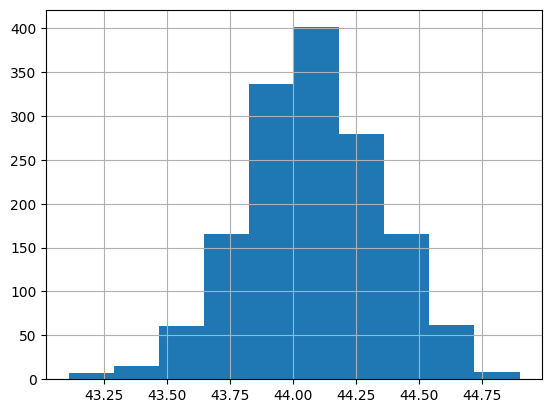

In [72]:
#Visualizamos las medias de nuestras 1500 muestras
muestras.mean().hist()

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

In [73]:
#Verificamos , la media de la Edad en datos es = 44.0714
datos.Edad.mean()

np.float64(44.07142113482561)

In [74]:
# Y en nuestro conjunto de 1500 muestras es 44.0742
muestras.mean().mean()

np.float64(44.07835399999999)

### El **Teorema Central del Límite**
> Establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [75]:
muestras.mean().std()

0.2734865693589841

In [76]:
datos.Edad.std()

12.480583465360187

In [77]:
datos.Edad.std() / np.sqrt(n)

np.float64(0.2790743302740527)


### 📝 Apunte Teórico: Estimación y el Teorema Central del Límite

Antes de entrar al teorema en sí, debemos definir qué estamos haciendo cuando realizamos una "estimación".

#### 1. ¿Qué es la Estimación?

Es el proceso de obtener información sobre los parámetros de una población a partir de los datos que extraemos de una muestra.

* **Parámetros Poblacionales:** Son los atributos numéricos reales y exactos de la población total, como pueden ser la media o la desviación estándar.
* **Estimación Puntual:** Es el cálculo de esas métricas (la media y la desviación estándar) realizado exclusivamente con los datos de la muestra. Debido a que no estamos trabajando con la población completa, esta aproximación siempre lleva un cierto margen de error embutido.

#### 2. El Teorema Central del Límite (TCL)

Este teorema es la solución matemática para lidiar con el margen de error mencionado anteriormente. Su definición formal establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal.

Lo verdaderamente extraordinario de este teorema es que afirma que **no importa el comportamiento original de la variable**; la distribución de las medias muestrales siempre se comportará como una variable aproximadamente normal.

#### 3. Los Tres Pilares del TCL

Para que podamos aplicar este teorema con seguridad, se rige por tres propiedades o afirmaciones matemáticas:

* **Pilar 1 (La Media):** La media de la distribución muestral será igual (o extremadamente aproximada) a la media original de la población.
* **Pilar 2 (El Error Estándar):** La desviación estándar de las medias muestrales es igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. A esta métrica se le conoce formalmente como el **Error Estándar de la Media**:

$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$


* **Pilar 3 (La Regla del 30):** Esta aproximación a la distribución normal se garantiza siempre y cuando el tamaño de las muestras ($n$) sea mayor o igual a 30.

---

### 💻 ¿Qué demostró el código del cuaderno? (El Laboratorio)

El bloque de código con el ciclo `for` no es una operación que harías habitualmente, sino un "laboratorio" diseñado para comprobar empíricamente que el Teorema Central del Límite funciona.

1. **Extracción Masiva:** El código generó 1500 muestras distintas, y cada una de esas muestras tenía un tamaño de 2000 observaciones ($n=2000$) extraídas de la variable 'Edad'.
2. **Cálculo de Medias:** Luego, calculó la media individual para cada una de esas 1500 muestras.
3. **La Prueba Visual:** Al graficar el histograma de esas 1500 medias, se observó que el comportamiento se aproximaba bastante a la clásica campana de una distribución normal.
4. **La Prueba Matemática:**
* La media original de la variable edad en todos los datos era de aproximadamente 44.0714. Al calcular la media general de las 1500 muestras muestrales, el resultado fue 44.0742, lo que demuestra empíricamente el *Pilar 1* (son muy aproximadas).
* Al dividir la desviación estándar original de la población (12) por la raíz cuadrada de 2000 ($\sqrt{n}$), el valor resultante fue bastante aproximado al de la desviación estándar calculada directamente sobre las muestras, confirmando el *Pilar 2* de la fórmula matemática.



Gracias a que este teorema está matemáticamente comprobado, en la práctica ya no necesitamos extraer 1500 muestras. Nos basta con extraer **una sola muestra representativa** (mayor a 30 elementos) y aplicar estas fórmulas para hacer inferencias válidas.


Vamos a "abrir el capó" de esa $\sqrt{n}$. La explicación tiene una base matemática innegable que nace de la diferencia entre **Varianza** (unidades al cuadrado) y **Desviación Estándar** (unidades reales).

Aquí tienes la explicación detallada para tu apunte teórico:

---

### 🧠 Apunte Teórico Profundo: El Origen de la $\sqrt{n}$

Para entender por qué el error se reduce con la raíz cuadrada, tenemos que recordar una regla de oro de la estadística: **Las Desviaciones Estándar no se pueden sumar directamente, pero las Varianzas sí.**

Llevémoslo a tu PyME. Imagina que cada cliente que entra a tu tienda tiene un nivel de impredecibilidad en su compra. A esto lo llamaremos su Varianza ($\sigma^2$).

#### Paso 1: La Suma de los Riesgos (Independencia)

Si entran 100 clientes independientes a tu tienda ($n = 100$), el riesgo total (la impredecibilidad total del día) es simplemente la suma de las impredecibilidades individuales.

* Varianza de 1 cliente = $\sigma^2$
* Varianza total de $n$ clientes = $n \times \sigma^2$

Hasta aquí, el riesgo crece de forma **lineal**. Si tienes 100 clientes, la Varianza total es 100 veces mayor que la de un solo cliente.

#### Paso 2: El Efecto Promedio (La Matemática de las Fracciones)

El Teorema Central del Límite no analiza el "Total Vendido", analiza el **"Promedio Vendido"** ($\bar{X}$). Para calcular un promedio, tomas ese gran total y lo divides por $n$.

Aquí entra la ley matemática fundamental: **Cuando divides una variable por una constante ($n$), su Varianza se divide por el cuadrado de esa constante ($n^2$).** ¿Por qué? Porque la Varianza es una medida cuadrática ("Pesos al cuadrado").

Entonces, la Varianza de nuestro Promedio queda así:


$$Varianza\ del\ Promedio = \frac{n \times \sigma^2}{n^2}$$

Si simplificamos esa fracción (cancelando la $n$ de arriba con una $n$ de abajo), nos queda el núcleo de la cuestión:


$$Varianza\ del\ Promedio = \frac{\sigma^2}{n}$$

#### Paso 3: El Regreso a la Realidad (La Raíz Cuadrada)

Ese resultado ($\frac{\sigma^2}{n}$) está en "Pesos al cuadrado". Para que un gerente pueda entenderlo, necesitamos devolverlo a "Pesos reales" (Desviación Estándar o Error Estándar).

Para pasar de Varianza a Desviación Estándar, aplicamos la raíz cuadrada a toda la fracción:


$$Error\ Estándar = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}}$$

### 🏢 La Lógica de Negocio (El Rendimiento Decreciente)

Esta demostración matemática explica un concepto comercial brutal: **La ley de los rendimientos decrecientes en la información.**

Como el error se divide por $\sqrt{n}$, la precisión no aumenta al mismo ritmo que tu esfuerzo:

* Si encuestas a **100 clientes** ($\sqrt{100} = 10$), reduces tu margen de error a la décima parte. ¡Excelente inversión!
* Si quieres reducir el error a la mitad de eso (dividir por 20), no te basta con encuestar al doble de clientes (200). Tienes que encuestar a **400 clientes** ($\sqrt{400} = 20$). Cuadruplicar el costo logístico para solo duplicar la precisión.

Por eso, en las elecciones o en las investigaciones de mercado, las encuestadoras se detienen alrededor de los 1.000 o 1.500 casos. A partir de ahí, la $\sqrt{n}$ hace que encuestar a más personas sea carísimo para la poquísima precisión extra que te aporta.

---

## <font color=green>4.2 Los niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimación.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.


$$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

### Con desviación estándar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

Siendo:
- ($\mu$) = media poblacion (que estamos estimando)
- ($\bar{x}$) = media de la muestra
- ($\pm z\frac{\sigma}{\sqrt{n}}$) = +/- el error estandar


#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

Siendo:
- ($\mu$) = media poblacion (que estamos estimando)
- ($\bar{x}$) = media de la muestra
- ($\pm z\frac{s}{\sqrt{n}}$) = +/- el error muestral


### <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una población normal con **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5050 g**. Construya un intervalo de confianza para el **promedio de la población** asumiendo un **nivel de significancia del 5%**.

### Media muestral

In [78]:
media_muestra = 5050
media_muestra

5050

### Nivel de significancia ($\alpha$)

In [79]:
significancia = 0.05
significancia

0.05

### Nivel de confianza ($1 - \alpha$)

In [80]:
confianza = 1 - significancia
confianza

0.95

### Obteniendo $z$

In [81]:
# Si queremos podemos buscar el valor de Z mas cercano a lo que buscamos ,
# visualmente usando la misma tabla --> buscamos la mitad de 0.05 + 0.95 , o sea
# 0.975--->1.96
tabla_normal_estandarizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

In [82]:
#Equivalente a la cuenta anterior.
0.95 / 2

0.475

In [83]:
0.5  + (0.95 / 2)

0.975

In [84]:
# utilizamos la funcion ppf -> percent point function , la inversa a la cdf (la
# que nos da la probabilidad acumulada hasta el Z)
z = norm.ppf(0.975)
display(z)
display(norm.cdf(z))


np.float64(1.959963984540054)

np.float64(0.975)

### Valores de $z$ para los niveles de confianza más utilizados

>|Nivel de<br>confianza|Valor del área bajo<br>la curva normal| $z$ |
>|:----------------:|:---------------------------------:|:---:|
>|90%               |0.95                               |1.645|
>|95%               |0.975                              |1.96 |
>|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

In [85]:
desviacion_estandar = 150
desviacion_estandar

150

In [86]:
n = 20
n

20

In [87]:
raiz_de_n = np.sqrt(n)
raiz_de_n

np.float64(4.47213595499958)

In [88]:
# Este es el valor que se corresponde con la desviacion estandar de las muestras
sigma = desviacion_estandar / raiz_de_n
sigma

np.float64(33.54101966249684)

### Obteniendo $e$

In [89]:
# Obtenemos el error estandar z---> lo calculamos previamente para nuestro nivel
# de confianza deseado
e = z*sigma
e

np.float64(65.73919054324361)

### Solución 1 - Calculando el intervalo de confianza para la media

In [90]:
# definimos nuestro intervalo de confianza
intervalo = (
    media_muestra - e,
    media_muestra + e
)
# Explicado esto implica que el saco tiene una porobabilidad de confianza del
# 95% de pesar entre los dos siguientes valores.
intervalo

(np.float64(4984.260809456757), np.float64(5115.739190543243))

### Solución 2 - Calculando el intervalo de confianza para la media

In [91]:
# Podemos calcular el intervalo de confianza directamente con la función
# 'interval' de scipy.stats.norm.
norm.interval(confidence = 0.95, loc = media_muestra, scale = sigma)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

### Problema:
Para estimar la cantidad media gastada por cada cliente de una gran cadena de comida rápida, se seleccionó una muestra de 50 clientes.
Suponiendo que el valor de la desviación estándar de la población es de $ 6,00 y que esta población se distribuye normalmente, obtenga el margen de error de esta estimación para un nivel de confianza del 95%.

In [92]:
# Datos del problema
n = 50  # tamaño de la muestra
desviacion_poblacion = 6  # desviación estándar de la población
confianza = 0.95  # nivel de confianza

# 1. Obteniendo el valor de z para el nivel de confianza del 95%
# Para un intervalo de confianza bilateral del 95%, el área de la cola es (1 -
# 0.95) / 2 = 0.025 en cada lado. Por lo tanto, el área acumulada para z es
# 0.95 + 0.025 = 0.975.
z = norm.ppf(0.5 + (confianza / 2))

# 2. Calculando el error estándar de la media (sigma_x_bar)
sigma_x_bar = desviacion_poblacion / np.sqrt(n)

# 3. Calculando el margen de error (e)
e = z * sigma_x_bar

print(f'El valor de z para un 95% de confianza es: {z:.2f}')
print(f'El error estándar de la media es: {sigma_x_bar:.2f}')
print(f'El margen de error (e) para la estimación es: {e:.2f}')

El valor de z para un 95% de confianza es: 1.96
El error estándar de la media es: 0.85
El margen de error (e) para la estimación es: 1.66


### Problema:
Una muestra aleatoria simple de 1976 elementos de una población distribuida normalmente, con una desviación estándar de 11, dio como resultado una media muestral de 28.

¿Cuál es el intervalo de confianza del 90% para la media de la población?

In [93]:
n = 1976
desviacion_poblacion = 11
media_muestral = 28
confianza = 0.90

# Calculamos el error estándar de la media
error_estandar = desviacion_poblacion / np.sqrt(n)

# Calculamos el intervalo de confianza
intervalo_confianza = norm.interval(confidence=confianza, loc=media_muestral, scale=error_estandar)

print(f'El intervalo de confianza del {confianza*100:.0f}% para la media de la población es: {intervalo_confianza}')

El intervalo de confianza del 90% para la media de la población es: (np.float64(27.592969951356466), np.float64(28.407030048643534))


### 📝 Apunte Teórico: El Intervalo de Confianza (El Rango de la Realidad)

En los negocios, dar un "número exacto" (Estimación Puntual) es casi garantizar que te vas a equivocar. Si le dices a tus inversores: *"Nuestros clientes gastan exactamente `$5.050`"*, y luego gastan `$5.040`, quedas como un mentiroso.
La estadística profesional te enseña a dar un **Rango de Realidad** (Estimación Intervalar): *"Tengo un 95% de seguridad de que los clientes gastan entre `$4.984` y `$5.115`*. Esto te permite planificar el "Peor Escenario" (Límite Inferior) y el "Mejor Escenario" (Límite Superior).

#### 1. Confianza vs. Significancia (El Yin y el Yang)

* **Nivel de Confianza ($1 - \alpha$):** Representa la probabilidad de acertar en una determinada estimación. En la industria, el estándar de oro suele ser fijarlo en el 95%.
* **Nivel de Significancia ($\alpha$):** Es la probabilidad de error de la estimación. Si tu confianza es del 95%, asumes un riesgo del 5% de que la realidad caiga fuera de tu predicción.

#### 2. La Anatomía del Z-Score para Intervalos

Como la campana de Gauss es simétrica, ese 5% de error no está en un solo lado; se divide en dos colas ($\alpha/2$) a ambos lados de la curva.

Para calcular el $Z$, no buscas el 0.95. Buscas el 0.50 (la mitad izquierda de la campana) más la mitad de tu nivel de confianza (0.95 / 2 = 0.475), lo que te da un área acumulada de **0.975**. Al buscar 0.975 en la tabla o en Python, obtienes el famoso **$Z = 1.96$**.

#### 3. El Error Inferencial (Margen de Error)

Es el "colchón" que le sumas y le restas a tu promedio. La fórmula del error inferencial involucra el valor de Z de la curva normal multiplicado por la desviación estándar de las medias muestrales.


$$e = z \times \frac{\sigma}{\sqrt{n}}$$

* *Nota Senior:* Cuando conocemos la desviación estándar poblacional ($\sigma$), usamos esta fórmula. Si no la conocemos (que es lo habitual), la fórmula teórica dice que usemos la desviación de la muestra ($s$).

---

### 💻 Código Senior: Motor de Intervalos de Confianza

Tu resolución de los ejercicios fue perfecta. Vamos a consolidar esa lógica en una función de producción, lista para integrarse en un módulo de Inteligencia de Negocios. Aplicaremos *Clean Code* y tipado estático (`Type Hints`) para que sea robusta.



In [94]:
import numpy as np
from scipy.stats import norm
from typing import Tuple

# ==============================================================================
# MOTOR DE INFERENCIA ESTADÍSTICA (GESTIÓN PYME INTELIGENTE)
# ==============================================================================

def calcular_intervalo_confianza(
    media_muestral: float,
    desviacion: float,
    n: int,
    nivel_confianza: float = 0.95
) -> Tuple[float, float]:
    """
    Calcula el intervalo de confianza poblacional a partir de una muestra.

    Parámetros:
    - media_muestral: El promedio obtenido en la muestra.
    - desviacion: La desviación estándar (poblacional o muestral).
    - n: El tamaño de la muestra.
    - nivel_confianza: Grado de seguridad requerido (default 95%).

    Retorna:
    - Tuple (limite_inferior, limite_superior)
    """
    if n < 30:
        print("⚠️ Advertencia (Regla de Negocio): Tamaño de muestra menor a 30. "
              "El Teorema Central del Límite podría no garantizar una distribución normal perfecta.")

    # 1. Calculamos el Error Estándar de la Media
    error_estandar = desviacion / np.sqrt(n)

    # 2. Delegamos el cálculo del intervalo matemático a SciPy
    limite_inferior, limite_superior = norm.interval(
        confidence=nivel_confianza,
        loc=media_muestral,
        scale=error_estandar
    )

    return round(limite_inferior, 2), round(limite_superior, 2)

# --- PRUEBA DEL MÓDULO (Ejemplo de la cadena de comida rápida) ---
promedio_gastado_muestra = 25.50  # Supongamos que la media muestral fue $25.50
desv_poblacional = 6.00
muestra_clientes = 50

lim_inf, lim_sup = calcular_intervalo_confianza(
    media_muestral=promedio_gastado_muestra,
    desviacion=desv_poblacional,
    n=muestra_clientes,
    nivel_confianza=0.95
)

print("\n--- REPORTE DE FORECASTING (PROYECCIÓN DE VENTAS) ---")
print(f"Basado en una muestra de {muestra_clientes} clientes:")
print(f"Tenemos un 95% de confianza en que el gasto promedio REAL de toda nuestra base de clientes")
print(f"se encuentra entre ${lim_inf} (Peor Escenario) y ${lim_sup} (Mejor Escenario).")




--- REPORTE DE FORECASTING (PROYECCIÓN DE VENTAS) ---
Basado en una muestra de 50 clientes:
Tenemos un 95% de confianza en que el gasto promedio REAL de toda nuestra base de clientes
se encuentra entre $23.84 (Peor Escenario) y $27.16 (Mejor Escenario).


### 🧠 El Insight del Arquitecto

Con esta función, ya no necesitas preocuparte por calcular el $Z$ de forma manual ni recordar si debías sumar $0.5$ o no. Pasas los parámetros de tu negocio y Python te devuelve directamente el "Mejor" y "Peor" escenario.

# <font color=green>5 CÁLCULO DEL TAMAÑO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***
# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviación estándar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

In [95]:
# Calculams nuestros limites
0.95 / 2

0.475

In [96]:
0.5 + 0.95 / 2

0.975

In [97]:
z = norm.ppf(0.975)
z

np.float64(1.959963984540054)

### Obteniendo $\sigma$

In [98]:
# Es la media muestral
sigma = 3323.39
sigma

3323.39

### Obteniendo $e$

In [99]:
#En este escenario planteamos un error maximo de 100
e = 100
e

100

### Obteniendo $n$

In [100]:
# Esta formula es el resultado de despejar n de la formula
n = (z * (sigma / e)) ** 2
# Como el resultado no es necesariamente entero, lo forzamos
int(n.round())

4243

El valor promedio gastado por los clientes en una tienda es de `$ 45.50`. Suponiendo que la desviación estándar de los gastos es de `$ 15.00`, ¿cuál debería ser el tamaño de la muestra para estimar la media de la población con un nivel de significancia del 10%?

Tenga en cuenta que el error máximo aceptable es del 10%.

In [101]:
# Aqui queremos calcular n
media_poblacional = 45.50
desviacion_estandar = 15.00
nivel_significancia = 0.10
#Calculamos el z
z = norm.ppf(1 - (nivel_significancia/2))
# ahora empleamos la formula
n = (z * (desviacion_estandar / (media_poblacional * nivel_significancia))) ** 2
display(n.round())

np.float64(29.0)

---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

### Obteniendo $N$

In [102]:
# La N mayuscula representa el tamaño de la poblacion . Nos permite hacer la
# correccion a la formula anterior.
N = 10000
N

10000

### Obteniendo $z$

In [103]:
# Buscamos 1- \alfa /2
z = norm.ppf((0.5 + (0.95 / 2)))
z

np.float64(1.959963984540054)

### Obteniendo $s$

In [104]:
# sigma o desviacion estandar muestral
s = 12
s

12

### Obteniendo $e$

In [105]:
# el error maximo
e = 5
e

5

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [106]:
# replicando la formula usando nuestras variables
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

22

Un fabricante de harina encontró que, en una muestra aleatoria compuesta por 200 sacos de 25 kg de un lote compuesto por 2000 sacos, mostraba una desviación estándar muestral del peso igual a 480 g.

Considerando un error máximo asociado con el promedio poblacional de 0.3 kg y un nivel de confianza del 95%, ¿qué tamaño de muestra debe seleccionarse para obtener una estimación confiable del parámetro poblacional?

In [110]:
# en este problema buscamos el mejor n. Los datos que nos dan son:
N = 2000 # Tamaño poblacion
# Lo siguiente debe estar o todo en Kg o todo en gramos.
s = 480 / 1000  # Desviacion muestral en kg (480 g = 0.48 kg)
e = 0.3 # Error maximo en kg
nivel_confianza = 0.95 # Nivel de confianza
z = norm.ppf(0.5 + (nivel_confianza / 2))
#ahora utilizamos la formula:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
print(f'El tamaño de muestra requerido es: {int(n.round())}')

El tamaño de muestra requerido es: 10


Imagina que esa empresa destruyó 100 latas para medir su calidad, cuando la matemática demostraba que con destruir solo 22 latas lograban el mismo 95% de confianza. ¡Destruyeron 78 latas por pura ignorancia estadística! Multiplica eso por todos los lotes del año y tendrás millones en pérdidas.

### 📝 Apunte Teórico: El Retorno de Inversión (ROI) del Muestreo

Calcular el tamaño de la muestra ($n$) no es un requisito académico, es una herramienta de optimización de presupuestos. El objetivo es encuestar (o destruir) la **cantidad mínima indispensable** de elementos para alcanzar la precisión que exige la gerencia.

#### 1. El Impacto del Error ($e$) en los Costos

Observa la fórmula básica: $n = \left(z\frac{\sigma}{e}\right)^2$
El Error ($e$) está en el denominador y toda la fracción está elevada al cuadrado.

* **Regla de Negocio:** Si tu gerente te pide reducir el margen de error a la mitad, no vas a necesitar el doble de encuestas... **¡vas a necesitar el cuádruple!** Exigir "precisión perfecta" dispara los costos operativos de forma exponencial.

#### 2. Población Infinita vs. Finita

¿Cómo decide el motor de tu software qué fórmula usar?

* **Infinita:** Se usa cuando no conoces el total exacto de tu población, o cuando este número es tan masivo (ej. todos los habitantes de Argentina) que extraer una muestra no altera a los que quedan.
* **Finita (El Factor de Corrección):** Se usa cuando tienes un universo cerrado y contable ($N$). Ej: Un lote exacto de 2.000 sacos de harina o una base de datos de 10.000 clientes VIP. Al saber que el universo tiene un límite, la matemática te "premia" exigiendo una muestra ligeramente menor.

---

### 🧠 El "Secreto" Estadístico: El Redondeo Hacia Arriba

Antes de pasar al código, hay una regla de oro en estadística que el curso aplicó usando `int(n.round())`, pero que en producción tiene un pequeño "peligro".

En el cálculo del tamaño de la muestra ($n$), **siempre se debe redondear hacia arriba**, sin importar los decimales.

* **Lógica de Negocio:** Si la fórmula te dice que necesitas encuestar a $22.1$ clientes para alcanzar el 95% de confianza, no puedes encuestar a medio cliente. Si redondeas hacia abajo ($22$), te quedarás corto y tu confianza real será del 94.8%. Para garantizar el contrato que firmaste con tu gerente (95%), estás obligado a encuestar al cliente número 23. En Python, esto se hace con `math.ceil()`.

---

### 💻 Módulo de Muestreo Funcional (Clean Code)

He abstraído el cálculo del Z-Score en una función auxiliar para no repetir código (el principio *DRY: Don't Repeat Yourself*).

In [111]:

import math
from scipy.stats import norm

# ==============================================================================
# MOTOR DE MUESTREO (CÁLCULO DE 'n')
# ==============================================================================

def _obtener_z_score(nivel_confianza: float) -> float:
    """
    Función auxiliar (privada) que convierte el % de confianza comercial
    en el valor Z matemático correspondiente de las dos colas.
    """
    area_acumulada = 0.5 + (nivel_confianza / 2)
    return norm.ppf(area_acumulada)

def calcular_muestra_infinita(desviacion: float, error_maximo: float, nivel_confianza: float = 0.95) -> int:
    """
    Calcula el tamaño de muestra para poblaciones INFINITAS o desconocidas.
    Fórmula: n = (Z * (sigma / e))^2
    Uso de Negocio: Encuestas de mercado abiertas, estimación de salarios generales.
    """
    z = _obtener_z_score(nivel_confianza)

    n = (z * (desviacion / error_maximo)) ** 2

    # TÉCNICA SENIOR: Siempre redondeamos hacia arriba en muestreo
    return math.ceil(n)

def calcular_muestra_finita(poblacion_total: int, desviacion: float, error_maximo: float, nivel_confianza: float = 0.95) -> int:
    """
    Calcula el tamaño de muestra para poblaciones FINITAS (conocidas).
    Fórmula con factor de corrección: n = (Z^2 * s^2 * N) / (Z^2 * s^2 + e^2 * (N-1))
    Uso de Negocio: Auditorías de calidad en lotes exactos, bases de datos de clientes.
    """
    z = _obtener_z_score(nivel_confianza)

    # Dividimos la fórmula en numerador y denominador para Clean Code
    numerador = (z**2) * (desviacion**2) * poblacion_total
    denominador = ((z**2) * (desviacion**2)) + ((error_maximo**2) * (poblacion_total - 1))

    n = numerador / denominador

    return math.ceil(n)

# ==============================================================================
# PRUEBAS DEL MÓDULO (Ejemplos del Curso)
# ==============================================================================

# Prueba 1: Ingresos de Jefes de Familia (Población Infinita)
n_ingresos = calcular_muestra_infinita(desviacion=3323.39, error_maximo=100)
print(f"--- CASO A: POBLACIÓN INFINITA ---")
print(f"Para estimar salarios con margen de $100, encuestar a: {n_ingresos} familias.\n")

# Prueba 2: Lote de Latas de Gaseosa (Población Finita)
n_latas = calcular_muestra_finita(poblacion_total=10000, desviacion=12, error_maximo=5)
print(f"--- CASO B: POBLACIÓN FINITA ---")
print(f"Para auditar un lote de 10.000 latas con error de 5ml, abrir: {n_latas} latas.")


--- CASO A: POBLACIÓN INFINITA ---
Para estimar salarios con margen de $100, encuestar a: 4243 familias.

--- CASO B: POBLACIÓN FINITA ---
Para auditar un lote de 10.000 latas con error de 5ml, abrir: 23 latas.


### 🧠 Análisis Arquitectónico

Fíjate cómo este diseño separa completamente el **"Qué"** del **"Cómo"**.
Tu gerente (o tu programa principal) solo dice: *"Quiero auditar un lote de 10.000 latas con un error de 5 ml"*. No le importa qué es $Z$, ni cómo se despeja la ecuación. Llama a la función `calcular_muestra_finita` y obtiene el número `23`.

Si observas la salida, el código da `23` latas en lugar de `22` por la regla del redondeo hacia arriba (`math.ceil()`). Esto es entregar software con rigor estadístico y listo para producción.

# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el conjunto de datos según lo especificado por el problema

In [112]:
ingresos_5000 = datos.query('Ingreso <= 5000').Ingreso

In [114]:
# Verificamos los datos que nos dieron
sigma = ingresos_5000.std()
display(sigma)
media = ingresos_5000.mean()
display(media)

1082.794549030635

np.float64(1426.5372144947232)

### Calcular el tamaño de la muestra

In [116]:
# Como la poblacion es muy grande , asumimos infinita
#directamente usando norm.ppf
z = norm.ppf(0.975)
e = 10
n = (z * (sigma / e)) ** 2
int(n.round())

45039

### Calcular el intervalo de confianza para la media

In [119]:
intervalo = norm.interval(confidence=0.95, loc=media, scale= sigma/ np.sqrt(n))
intervalo

(np.float64(1416.5372144947232), np.float64(1436.5372144947232))

### Realización de una prueba gráfica

Crearemos 1000 muestras de 5000 , graficaremos 1000 valores de las medias. Graficamos la linea punteada como la media original, y las lineas rojas son nuestros limites del intervalod e confianza, lo esperado es que el95% de las medias por lo menos, esten entre lineas rojas

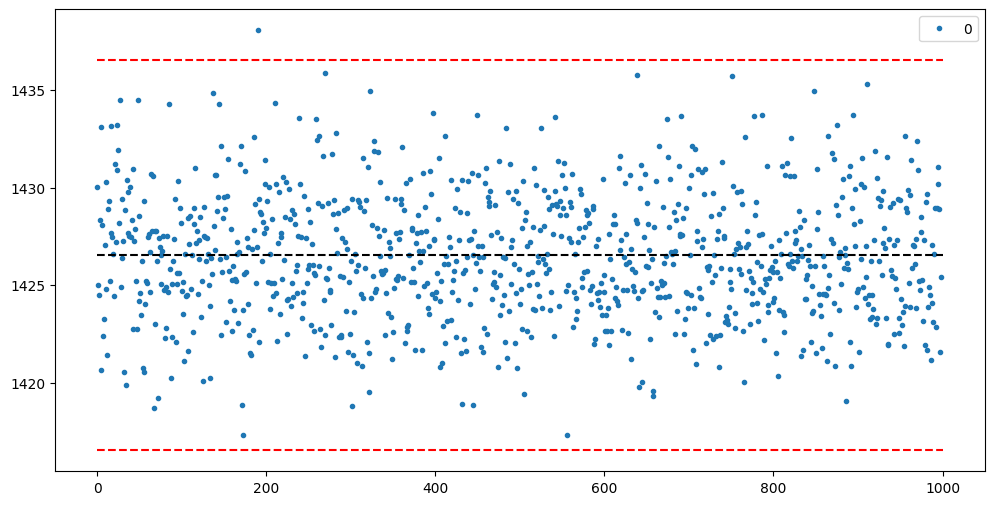

In [121]:
import matplotlib.pyplot as plt

tamano_simulacion = 1000

# Convertimos 'n' a un entero antes de pasarlo a sample()
medias = [ingresos_5000.sample(n = int(n)).mean() for i in range(1,tamano_simulacion)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12,6)
ax.hlines(y = media,xmin = 0, xmax = tamano_simulacion,colors = 'black',linestyles='dashed')
ax.hlines(y = intervalo[0],xmin = 0, xmax = tamano_simulacion,colors = 'red',linestyles='dashed')
ax.hlines(y = intervalo[1],xmin = 0, xmax = tamano_simulacion,colors = 'red',linestyles='dashed')

La visualización anterior es una excelente demostración del **Teorema Central del Límite (TCL)**:

1. Forma de la Distribución (Normalidad): Observa cómo los puntos azules (que representan las medias de 1000 muestras diferentes) se agrupan formando una figura que se asemeja a una campana de Gauss. El TCL establece que, incluso si la distribución original de los datos (ingresos_5000 en este caso) no es normal, la distribución de las medias muestrales tenderá a ser normal a medida que el tamaño de la muestra (n) aumenta. Aquí, n es muy grande (aproximadamente 45039), lo que refuerza esta tendencia.

2. Convergencia a la Media Poblacional: La línea negra punteada representa la media poblacional real. Puedes ver que la mayoría de los puntos azules (las medias de las muestras) se concentran muy cerca de esta línea. Esto ilustra otra propiedad clave del TCL: la media de la distribución de las medias muestrales es igual (o muy cercana) a la media de la población.

3. Intervalo de Confianza y Error Estándar: Las líneas rojas punteadas definen nuestro intervalo de confianza del 95%. La gran mayoría de los puntos azules caen dentro de estas líneas. Esto nos muestra cómo el TCL nos permite construir intervalos de confianza: al conocer la distribución (normal) y la desviación estándar de las medias muestrales (conocida como error estándar), podemos estimar con un alto grado de probabilidad dónde se encuentra la verdadera media poblacional basándonos en una sola muestra.